In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

AAPL = yf.download('AAPL','2008-01-01','2008-02-16')['Close']
MELI = yf.download('MELI','2008-01-01','2008-02-16')['Close']
MSFT = yf.download('MSFT','2008-01-01','2008-02-16')['Close']
AMZN = yf.download('AMZN','2008-01-01','2008-02-16')['Close']
KO = yf.download('KO','2008-01-01','2008-02-16')['Close']
GOOGL = yf.download('GOOGL','2008-01-01','2008-02-16')['Close']
GS = yf.download('GS','2008-01-01','2008-02-16')['Close']
DE = yf.download('DE','2008-01-01','2008-02-16')['Close']
JPM = yf.download('JPM','2008-01-01','2008-02-16')['Close']
IBM = yf.download('IBM','2008-01-01','2008-02-16')['Close']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
Precios = np.array([AAPL,
                    MELI,
                    MSFT,
                    AMZN,
                    KO,
                    GOOGL,
                    GS,
                    DE,
                    JPM,
                    IBM   ], dtype=float)
print(Precios.shape)

(10, 32)


In [3]:
U, S, V = np.linalg.svd(Precios)
S = np.diag(S)
V = V.conj().T[:,:]
print(V.shape)


(32, 32)


In [4]:
U, S, V = np.linalg.svd(Precios, full_matrices=False)
#S = np.diag(S)
V = V
print(np.allclose(((U * S) @ V), Precios))
print(U.shape)
print(S.shape)
print(V.shape)


True
(10, 10)
(10,)
(10, 32)


In [5]:
#DMD  
X1 = Precios[ : ,  : -1]
X2 = Precios[ : , 1 : ]

#X2 = A @ X1  ===>  A = X2 @ X1.inv

#A = X2 @ V.T @ np.linalg.inv(S) @ 

(10, 10)
(10,)
[0.26038007+0.36181821j 0.26038007-0.36181821j 1.00882143+0.j
 0.9299876 +0.00751964j 0.9299876 -0.00751964j 0.66253232+0.25335247j
 0.66253232-0.25335247j 0.55483595+0.2123553j  0.55483595-0.2123553j
 0.50134141+0.j        ]


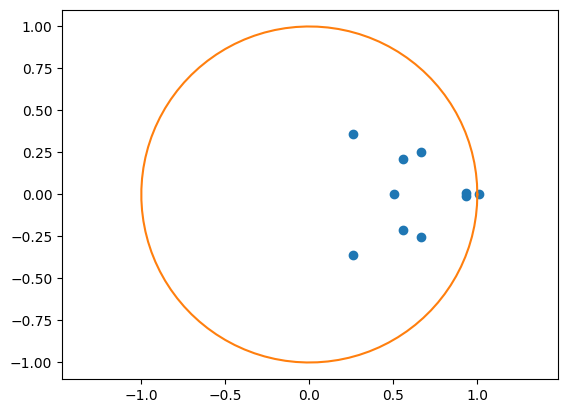

In [6]:

def dmd(X, Y, truncate=None):
    U2,Sig2,Vh2 = np.linalg.svd(X, False) # SVD of input matrix
    r = len(Sig2) if truncate is None else truncate # rank truncation
    U = U2[:,:r]
    Sig = np.diag(Sig2)[:r,:r]
    V = Vh2.conj().T[:,:r]
    Atil = U.conj().T @ Y @ V @ np.linalg.inv(Sig) # build A tilde
    mu,W = np.linalg.eig(Atil)
    Phi = Y @ V @ np.linalg.inv(Sig) @ W # build DMD modes
    return mu, Phi


mu, Phi = dmd(X1,X2)
print(Phi.shape)
print(mu.shape)
print(mu)

fig, ax = plt.subplots(1,1)
x = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.real(mu), np.imag(mu), 'o')
plt.plot(np.cos(x), np.sin(x))
plt.axis('Equal')
plt.show()

In [18]:
from datetime import date, datetime, timedelta
import pandas_datareader.data as web
from datetime import datetime
todays_date = date.today()
n = 30
date_n_days_ago = date.today() - timedelta(days=n)

while np.busday_count(date_n_days_ago, todays_date) != n:

    date_n_days_ago = date_n_days_ago - timedelta(days=1)

AAPL = yf.download('AAPL',date_n_days_ago,todays_date)['Close']
start_date = datetime.strptime('10 11 2010', '%m %d %Y')
start_date = date_select = datetime.strptime('12-1-2010', '%m-%d-%Y')

#print(start_date)

[*********************100%***********************]  1 of 1 completed


In [8]:
#Funcion que me da Matriz de Datos de los ultimos n dias habiles


Tickers = ['AAPL', 'MELI', 'MSFT', 'AMZN', 'KO', 'GOOGL', 'GS', 'DE', 'JPM', 'IBM']

# Formato fecha debe estas en mm-dd-yy
def Matriz_Precios(Tickers, date, past_days):
    end_date =  datetime.strptime(date, '%Y-%m-%d')
    start_date = end_date - timedelta(days=past_days)

    while len(pd.date_range(start_date.date(), end_date.date(), freq='B')) != past_days:

        start_date = start_date - timedelta(days=1)

    A = np.zeros((len(Tickers), past_days))
    i = 0

    for company in Tickers:
        ith_company = yf.download(company, start_date , end_date)
        A[i , :] = ith_company['Close']
        i = i + 1
    return(A)

#print(Matriz_Precios(Tickers, '2010-12-24', 30))
#'2010-11-11'

    

In [9]:
#Funcion que me da Matriz de Datos de los ultimos n dias habiles
import pandas as pd

# Formato fecha debe estas en mm-dd-yy

def Matriz_Precios(Tickers, start_date, end_date):

    #Convierto la fecha de clase str a clase date
    end_date =  datetime.strptime(end_date, '%Y-%m-%d')
    start_date = datetime.strptime(start_date, '%Y-%m-%d')

    #Busi = pd.date_range(start_date.date(), end_date.date(), freq='B')

    #Obtengo la cantidad de dias que tengo el dato de precio de las acciones
    N_columnas = len(yf.download('KO', start_date , end_date)['Close'])
    #Armo la matriz de precios, los cuales ire agregando
    A = np.zeros((len(Tickers), N_columnas))

    i = 0
    for company in Tickers:
        ith_company = yf.download(company, start_date , end_date)['Close']
        A[ i , :] = ith_company
        i += 1
    return(A)

X = Matriz_Precios(Tickers, '2010-06-01', '2011-06-01')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
#Funciones auxiliares

def soltrsupcol(M,n):
    z = n.copy()
    k = np.max(np.nonzero(n))
    for j in reversed(range(k + 1)):
        z[j] = z[j] / M[j,j]
        z[:j] = z[:j] - z[j] * M[: j, j]
    return z

def hh_vector(x):
    
    #u, rho = hh_vector(x)
    #Calcula u y rho tal que Q = I - rho u u^T
    #cumple Qx = \|x\|_2 e^1
    
    n = len(x)
    rho = 0
    u = x.copy()
    u[0] = 1.

    if n == 1:
        sigma = 0
    else:
        sigma = np.sum(x[1:]**2)

    if sigma>0 or x[0]<0:
        mu = np.sqrt(x[0]**2 + sigma)
        if x[0]<=0:
            gamma = x[0] - mu
        else:
            gamma = -sigma/(x[0] + mu)

        rho = 2*gamma**2/(gamma**2 + sigma)
        u = u/gamma
        u[0] = 1

    return u, rho

def qrhholder(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    p = min(m, n)

    for j in range(p):
        # I = j:, J = j:
        u, rho = hh_vector(R[j:, j])
        w = rho * u
        R[j:, j:] = R[j:, j:] - np.outer(w, u.T @ R[j:, j:])
        Q[:, j:] = Q[:, j:] - Q[:, j:] @ np.outer(w, u)

    return Q, R
    
def sol_cuadmin(A, b):
    m, n = A.shape

    #Asumimos que A tiene rango completo
    p = np.min([m,n])
    y_sol = np.zeros(n)
    # I = {1, ... , p} -> :p
    # J = {1, ... , p} \ I = {p+1, ... , n} -> p:

    Q, R = qrhholder(A)

    q = Q.T @ b

    y_sol[:p] = soltrsupcol(R[ :p, :p], q[:p])

    residuo = np.linalg.norm(q[p:])

    return y_sol, residuo

In [11]:
#DMD.

X1 = X[ : ,0 : 17]
X1 = X[ : ,0+1 : 17+1]

def dmd(X1, X2, truncate=None):

    U2,Sig2,Vh2 = np.linalg.svd(X, False) # SVD of input matrix

    r = len(Sig2) if truncate is None else truncate # rank truncation

    U = U2[:,:r]                    #
    Sig = np.diag(Sig2)[:r,:r]      #Trunco las matrices de la descomposicion SVD
    V = Vh2.conj().T[:,:r]          #

    Atil = U.conj().T @ X2 @ V @ np.linalg.inv(Sig) # build A tilde

    mu ,W = np.linalg.eig(Atil)

    Phi = X2 @ V @ np.linalg.inv(Sig) @ W # build DMD modes

    return mu, Phi, r

def x(t, r, mu, Phi):
    x = np.zeros(r)
    b = sol_cuadmin(Phi, X1[ : , 0])
    for k in range(r):
        x = x + Phi[: , k] * np.exp(mu[r] * t) * b[r]
    return(x)


In [6]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from numpy import dot, multiply, diag, power
from numpy import pi, exp, sin, cos, cosh, tanh, real, imag
from numpy.linalg import inv, eig, pinv
from scipy.linalg import svd, svdvals
from scipy.integrate import odeint, ode, complex_ode
from warnings import warn

#Define time and space domains
x = np.linspace(-10, 10, 100)
t = np.linspace(0, 6*pi, 80)
dt = t[2] - t[1]
Xm, Tm = np.meshgrid(x,t)

# create three spatiotemporal patterns
f1 = multiply(20-0.2*power(Xm, 2), exp((2.3j)*Tm))
f2 = multiply(Xm, exp(0.6j*Tm))
f3 = multiply(5*multiply(1/cosh(Xm/2), tanh(Xm/2)), 2*exp((0.1+2.8j)*Tm))

# combine signals and make data matrix
D = (f1 + f2 + f3).T

# create DMD input-output matrices
X = D[:,:-1]
Y = D[:,1:]

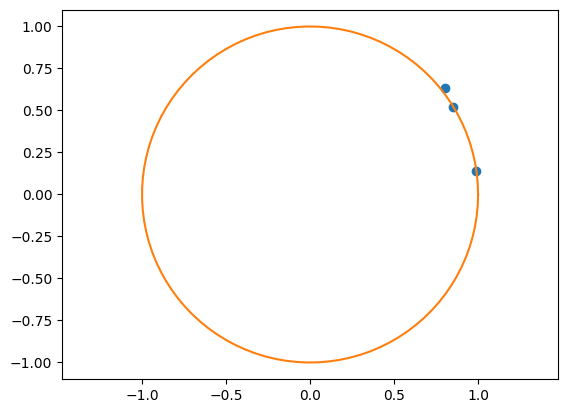

In [7]:
#SVD of input matrix
U2,Sig2,Vh2 = svd(X, False)

r = 3

U = U2[ : , : r]
Sig = diag(Sig2)[ : r, : r]
V = Vh2.conj().T[ : , : r]

#Build A tilde
Atil = dot(dot(dot(U.conj().T, Y), V), inv(Sig))

mu, W = eig(Atil)

fig, ax = plt.subplots(1,1)
x = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.real(mu), np.imag(mu), 'o')
plt.plot(np.cos(x), np.sin(x))
plt.axis('Equal')
plt.show()

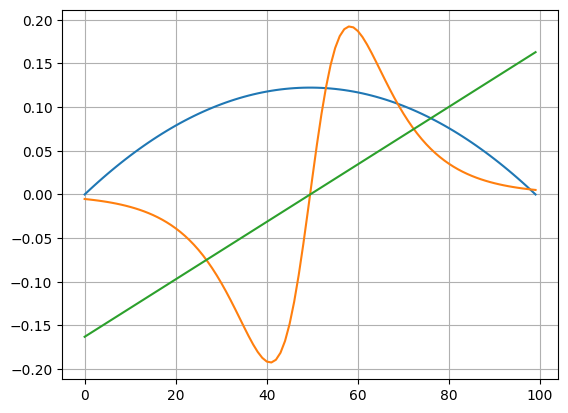

In [8]:
#Build DMD modes

Phi = dot(dot(dot(Y,V), inv(Sig)), W)

fig, ax = plt.subplots(1,1)

plt.plot(np.real(Phi[ : , 0]))
plt.plot(np.real(Phi[ : , 1]))
plt.plot(np.real(Phi[ : , 2]))

plt.grid()
plt.show()

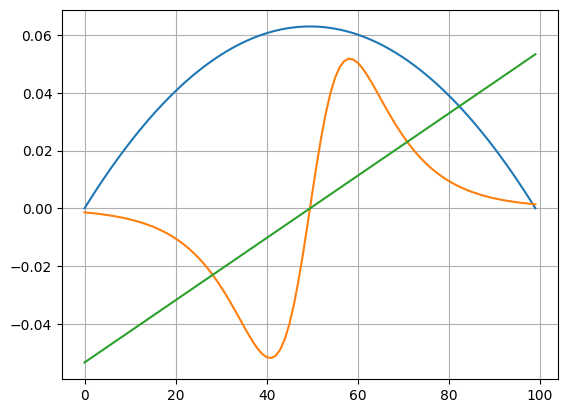

In [9]:
#Show imaginary part for curiosity
fig, ax = plt.subplots(1,1)

plt.plot(np.imag(Phi[ : , 0]))
plt.plot(np.imag(Phi[ : , 1]))
plt.plot(np.imag(Phi[ : , 2]))

plt.grid()
plt.show()

In [10]:
#Compute time evolution
b = dot(pinv(Phi), X[ : , 0])
Psi = np.zeros([r, len(t)], dtype='complex')
for i,_t in enumerate(t):
    Psi[ : , i] = multiply(power(mu, _t/dt), b)

#Compute DMD reconstruction
D2 = dot(Phi, Psi)
print(np.allclose(D, D2))

True
